In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
lats = np.random.uniform(low = -90.000, high= 90.000, size = 150)
lngs = np.random.uniform(low = -90.000, high= 90.000, size = 150)
lat_lngs = zip(lats, lngs)
lat_lngs

In [25]:
coordinates = list(lat_lngs)

In [26]:
from citipy import citipy

In [27]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

103

In [28]:
import requests

from config import weather_api_key

In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=60ca5e4d24bd3ca27c8342d1e29cfea0


In [30]:
city_url= url+ "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=60ca5e4d24bd3ca27c8342d1e29cfea0&q=Boston


In [31]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [32]:
import time
from datetime import datetime

In [33]:
city_data = []
print("Beginning Data Retrieval   ")
print("---------------------------")

#create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval   
---------------------------


In [34]:
for i in range(len(cities)):
    
    if (i % 50 == - and i >= 50):
            set_count +=1
            record_count = 1
            time.sleep(60)
            
    city_url = url+ "&q=" + cities[i]

SyntaxError: invalid syntax (Temp/ipykernel_8048/978511117.py, line 3)

In [35]:
#loop through all the cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    #create endpoint URl with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the URL, record, and set numbers and hte city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | wagar
Processing Record 5 of Set 1 | maracas
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | sauda
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | tarko-sale
Processing Record 11 of Set 1 | husavik
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | matucana
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | ambilobe
Processing Record 22 of Set 1 | arraial do cabo
Processing Rec

In [40]:
#convert the list of dictionaries to a pandas dataframe.
city_data_df =pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,83.91,68,100,15.14,MV,2022-03-21 00:59:42
1,Ribeira Grande,38.5167,-28.7000,57.74,62,93,25.37,PT,2022-03-21 00:59:43
2,Hermanus,-34.4187,19.2345,67.80,89,2,9.10,ZA,2022-03-21 00:59:43
3,Wagar,16.1525,36.2032,75.67,57,0,9.06,SD,2022-03-21 00:59:44
4,Maracas,-13.4411,-40.4308,63.79,89,0,7.02,BR,2022-03-21 00:59:44
5,Qaanaaq,77.4840,-69.3632,-6.07,93,100,6.96,GL,2022-03-21 00:59:45
6,Sauda,59.6506,6.3542,26.83,82,3,9.64,NO,2022-03-21 00:59:45
7,Ushuaia,-54.8000,-68.3000,51.46,66,20,13.80,AR,2022-03-21 00:59:45
8,Kruisfontein,-34.0033,24.7314,65.97,88,75,2.30,ZA,2022-03-21 00:59:46
9,Tarko-Sale,64.9225,77.7850,19.92,96,100,5.68,RU,2022-03-21 00:59:37


In [41]:
column_update_city_data_df=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_update_city_data_df]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-03-21 00:59:42,-0.6000,73.0833,83.91,68,100,15.14
1,Ribeira Grande,PT,2022-03-21 00:59:43,38.5167,-28.7000,57.74,62,93,25.37
2,Hermanus,ZA,2022-03-21 00:59:43,-34.4187,19.2345,67.80,89,2,9.10
3,Wagar,SD,2022-03-21 00:59:44,16.1525,36.2032,75.67,57,0,9.06
4,Maracas,BR,2022-03-21 00:59:44,-13.4411,-40.4308,63.79,89,0,7.02
...,...,...,...,...,...,...,...,...,...
83,Grand Gaube,MU,2022-03-21 01:01:17,-20.0064,57.6608,77.38,86,61,1.01
84,Cabedelo,BR,2022-03-21 01:01:18,-6.9811,-34.8339,80.35,79,61,10.85
85,Ilulissat,GL,2022-03-21 01:01:18,69.2167,-51.1000,-5.78,54,0,1.14
86,Puerto Plata,DO,2022-03-21 01:02:18,19.7934,-70.6884,76.44,85,1,9.82


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
#extract relevant fields from dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [44]:
import time
today= time.time()
today

1647824653.2426734

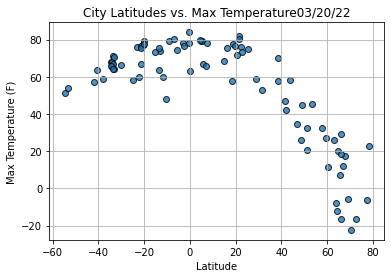

In [45]:
import time

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker = "o",
           alpha = 0.8, label= "Cities")

plt.title(f"City Latitudes vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

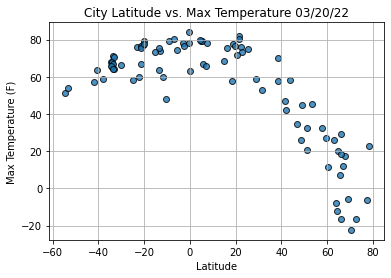

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

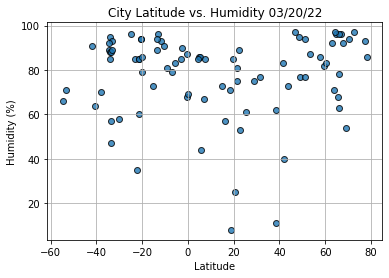

In [47]:
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

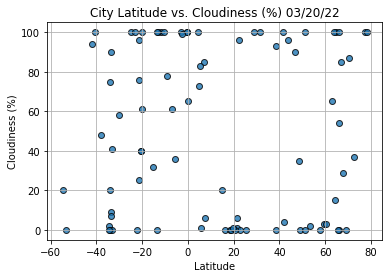

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

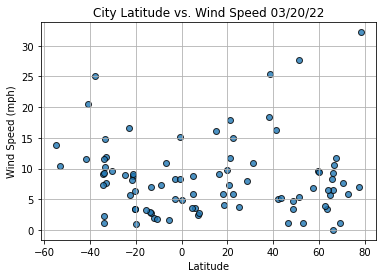

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate regression line "y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    #get equation of the line
    line_eq= "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [53]:
index13=city_data_df.loc[13]
index13

City                 Longyearbyen
Country                        SJ
Date          2022-03-21 00:59:48
Lat                       78.2186
Lng                       15.6401
Max Temp                    22.84
Humidity                       86
Cloudiness                    100
Wind Speed                  32.21
Name: 13, dtype: object

In [55]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)].head()

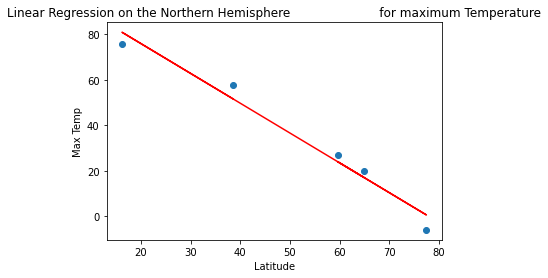

In [56]:
x_values = northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for maximum Temperature", "Max Temp",(10,40))

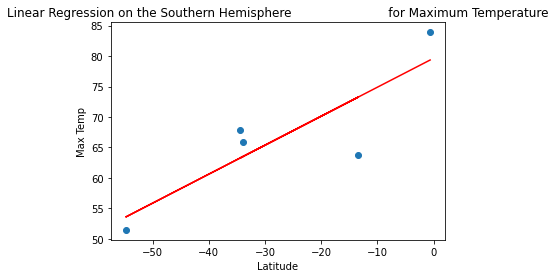

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

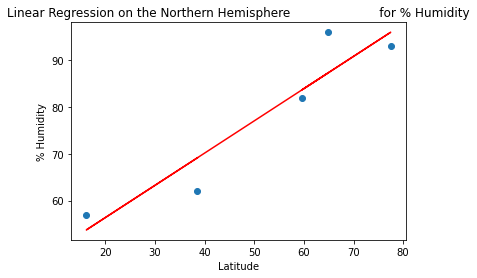

In [59]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Humidity", "% Humidity",(40,10))

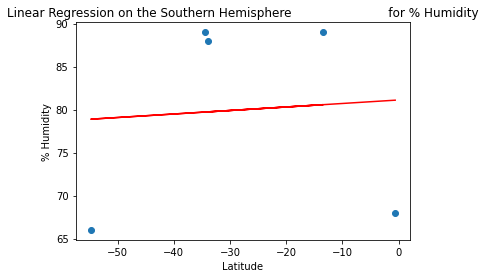

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

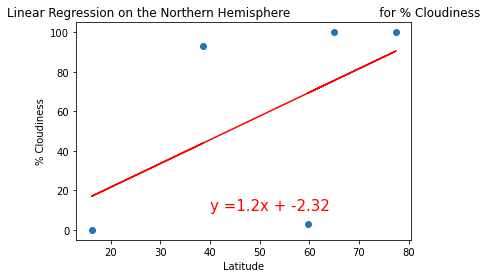

In [63]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Cloudiness", "% Cloudiness",(40,10))

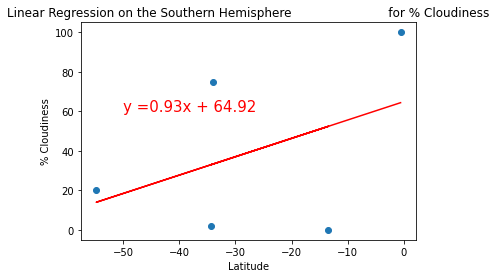

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

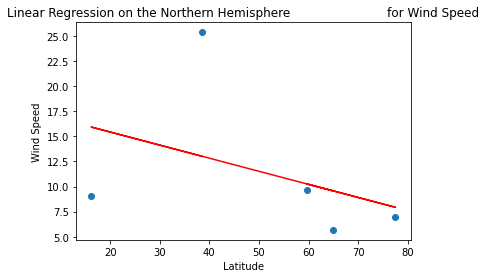

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

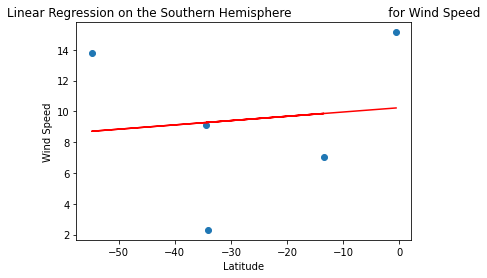

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))